In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading data
survey_data = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
data = survey_data
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
data.shape

(126, 7)

In [5]:
#checking for null values
data.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [6]:
# Checking if target variable is balanced
data.Y.value_counts()

1    69
0    57
Name: Y, dtype: int64

### <font color='green'>Data has no missing or null values</font> 
### <font color='green'>Target Variable is Balanced</font> 

In [7]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


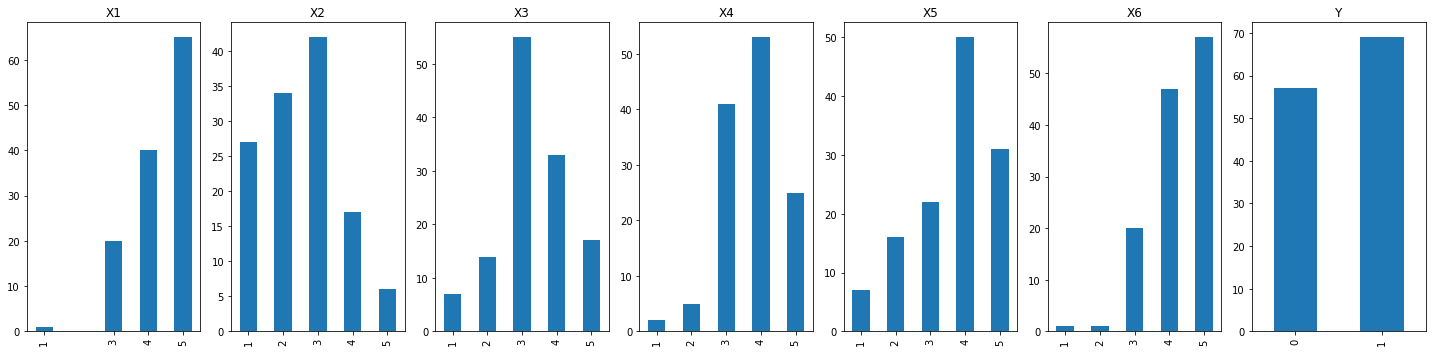

In [8]:
# Checking distribution of the data
fig, (ax1, ax2, ax3, ax4, ax5, ax6, axy) = plt.subplots(1,7, figsize=(20,5))
data.X1.value_counts().plot.bar(ax=ax1, title='X1')
data.X2.value_counts().plot.bar(ax=ax2, title='X2')
data.X3.value_counts().plot.bar(ax=ax3, title='X3')
data.X4.value_counts().plot.bar(ax=ax4, title='X4')
data.X5.value_counts().plot.bar(ax=ax5, title='X5')
data.X6.value_counts().plot.bar(ax=ax6, title='X6')
data.Y.value_counts().plot.bar(ax=axy, title='Y')

plt.tight_layout()    
plt.show()

In [9]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(data) 
#data.loc[:,:] = scaled_values

#### Applying Log Transformation

In [10]:
data['log_X1'] = np.log(data['X1'])
data['log_X2'] = np.log(data['X2'])
data['log_X3'] = np.log(data['X3'])
data['log_X4'] = np.log(data['X4'])
data['log_X5'] = np.log(data['X5'])
data['log_X6'] = np.log(data['X6'])

In [11]:
data.head()

,Y,X1,X2,X3,X4,X5,X6,log_X1,log_X2,log_X3,log_X4,log_X5,log_X6
0,0,3,3,3,4,2,4,1.098612,1.098612,1.098612,1.386294,0.693147,1.386294
1,0,3,2,3,5,4,3,1.098612,0.693147,1.098612,1.609438,1.386294,1.098612
2,1,5,3,3,3,3,5,1.609438,1.098612,1.098612,1.098612,1.098612,1.609438
3,0,5,4,3,3,3,5,1.609438,1.386294,1.098612,1.098612,1.098612,1.609438
4,0,5,4,3,3,3,5,1.609438,1.386294,1.098612,1.098612,1.098612,1.609438


In [12]:
data1 = data
data1 = data1.drop(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], axis =1)

In [13]:
data1.head()

,Y,log_X1,log_X2,log_X3,log_X4,log_X5,log_X6
0,0,1.098612,1.098612,1.098612,1.386294,0.693147,1.386294
1,0,1.098612,0.693147,1.098612,1.609438,1.386294,1.098612
2,1,1.609438,1.098612,1.098612,1.098612,1.098612,1.609438
3,0,1.609438,1.386294,1.098612,1.098612,1.098612,1.609438
4,0,1.609438,1.386294,1.098612,1.098612,1.098612,1.609438


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1.drop('Y',axis=1), data1.Y , test_size=0.1, random_state=21)

In [30]:
Y_test.shape

(13,)

In [19]:
#from sklearn.model_selection import train_test_split
#X_trainv, X_test, y_trainv, y_test = train_test_split(data.drop('Y',axis=1), data.Y , test_size=0.1, random_state=21)
#X_train, X_val, y_train, y_val = train_test_split(X_trainv, y_trainv, test_size=0.15, random_state=21)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc

In [26]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [40]:
#Logistic Regression:

print("Logistic Regression")
clf_model = LogisticRegression()
clf_model.fit(X_train, Y_train)
Y_pred = clf_model.predict(X_test)
print('Accuracy: ',clf_model.score(X_test, Y_test))
print('Coefficient of each feature:', clf_model.coef_)

Logistic Regression
Accuracy:  0.6153846153846154
Coefficient of each feature: [[ 1.10863245 -0.07451575  0.31654377 -0.22793556  0.58597691  0.28058205]]


In [42]:
#Naivee Bayes

print("Naive Bayes")
clf_model = MultinomialNB()
clf_model.fit(X_train, Y_train)
Y_pred = clf_model.predict(X_test)
print('Accuracy: ',clf_model.score(X_test, Y_test))

Naive Bayes
Accuracy:  0.7692307692307693


In [43]:
#Decision Tree

print("Decision Tree Classifier")
clf_model = DecisionTreeClassifier()
clf_model.fit(X_train, Y_train)
Y_pred = clf_model.predict(X_test)
print('Accuracy: ',clf_model.score(X_test, Y_test))
#print('Coefficient of each feature:', clf_model.coef_)

Decision Tree Classifier
Accuracy:  0.7692307692307693


In [44]:
#Random Forest

print("Random Forest")
clf_model = RandomForestClassifier()
clf_model.fit(X_train, Y_train)
Y_pred = clf_model.predict(X_test)
print('Accuracy: ',clf_model.score(X_test, Y_test))

Random Forest
Accuracy:  0.7692307692307693


In [45]:
#Gradient Boost

print("Gradient Boosting Classifier")
clf_model = GradientBoostingClassifier()
clf_model.fit(X_train, Y_train)
Y_pred = clf_model.predict(X_test)
print('Accuracy: ',clf_model.score(X_test, Y_test))

Gradient Boosting Classifier
Accuracy:  0.6153846153846154


### Results

- Our training data consists of 114/127 observations and test data consists of 13/127 observations

- Naive Bayes and Decision Tree performed better than other models providing an accuracy of 77%

- Based on the coefficient values of logistic regression, X2 (contents of my order was as I expected) and X4 (I paid a good price for my order), both these questions add very little value and hence can be excluded from the next survey 